<a href="https://colab.research.google.com/github/Kathi3/automatic-engine/blob/main/cyberbullying_ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

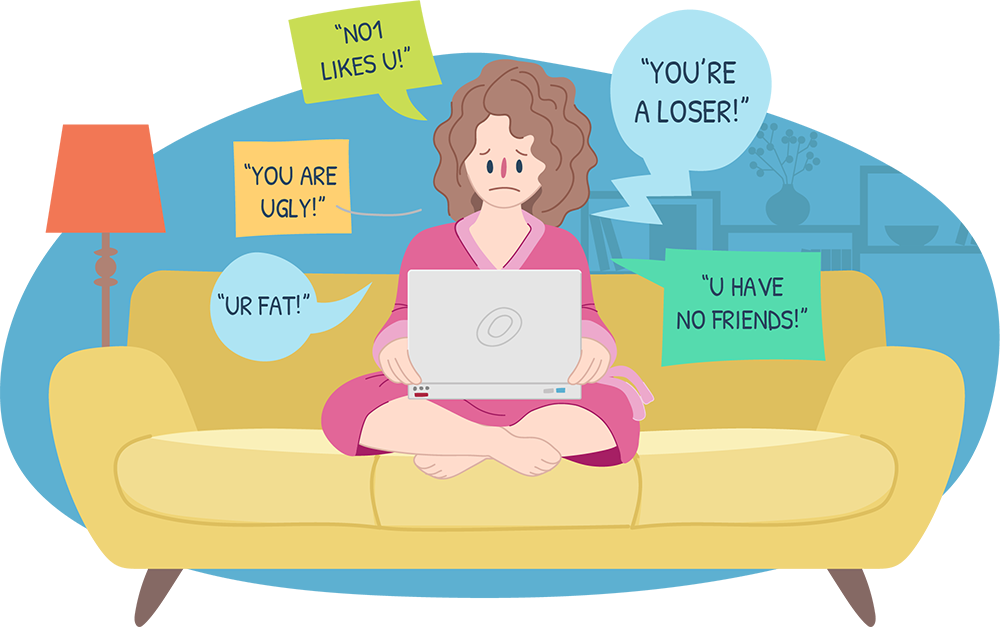

1. **Problem Statement** 

Global emerging trends indicate that cyberbullying is now recognised as a serious threat not just to the physical health of people, but also to their emotional well-being. Social network spheres in Kenya and around the world have become the new frontiers for not just gender-based and sexual violence, but also for the expression of toxic, patriarchal and violent masculinities. 

It is on this background that the mdoel to detect whether a tweet amounts to cyber bullying or not is explored

**2. Objective** 

To establish which model would best be able to predict whether a tweet results to a cyberbullying or otherwise

**3. Defining the Metrics of Success** 

The model will be considered succesful if it achieves an accuracy of atleast 80% accuracy. The analysis of tweets about cyberbullying, with the goal of performing a Sentiment Analysis using Naves Bayer, Bidirectional LSTM and BERT on PyTorch to predict if a tweet is about cyberbullying or not.

# Importing Libraries

In [ ]:
#!pip install transformers==2.1.0
!pip install beautifulsoup4
!pip install afinn
#Transformers library for BERT
!pip install pytorch-pretrained-bert
!pip install git+https://github.com/tasos-py/Search-Engines-Scraper

     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=7403a11ebc63394ca6ed5baf468c19871853d776fa2fcf819761d9ee7816029c
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn
     |████████████████████████████████| 123 kB 5.0 MB/s 
     |████████████████████████████████| 132 kB 9.9 MB/s 
     |████████████████████████████████| 79 kB 4.6 MB/s 
     |████████████████████████████████| 8.6 MB 9.0 MB/s 
     |████████████████████████████████| 138 kB 47.8 MB/s 
     |████████████████████████████████| 127 kB 47.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency 

In [ ]:
pip install transformers==3.0.0

     |████████████████████████████████| 754 kB 5.4 MB/s 
     |████████████████████████████████| 895 kB 40.9 MB/s 
     |████████████████████████████████| 1.2 MB 39.1 MB/s 
     |████████████████████████████████| 3.0 MB 35.1 MB/s 


In [ ]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(7.5,7.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16) 
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

In [ ]:
#Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text cleaning
import nltk
nltk.download('wordnet')
import re, string

from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re,string, nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings(action="ignore")
from wordcloud import WordCloud, STOPWORDS

#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

#Transformers library for BERT
#!pip install pytorch-pretrained-bert
import transformers
from transformers import BertModel
from transformers import BertTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup

from sklearn.metrics import classification_report, confusion_matrix

#Seed for reproducibility
import random

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

import time

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


<Figure size 432x288 with 0 Axes>

# Loading the data

!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/andrewmvd/cyberbullying-classification/download")

df = pd.read_csv('//content/cyberbullying-classification/cyberbullying_tweets.csv')
df.head()

df_original = pd.read_csv('/content/cyberbullying_tweets.csv')
df_original.head()

df = pd.read_csv('/content/cyberbullying_tweets.csv')
df.head()

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/andrewmvd/cyberbullying-classification/download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: victorsmythe
Your Kaggle Key: ··········


100%|██████████| 2.82M/2.82M [00:00<00:00, 67.6MB/s]

In [ ]:
df = pd.read_csv('//content/cyberbullying-classification/cyberbullying_tweets.csv')
df.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [ ]:
#df = pd.read_csv('/content/cyberbullying_tweets.csv.zip')
#df_original = pd.read_csv('/home/trees/Documents/cyberbullying_tweets.csv')
#df_original.head()

#df = pd.read_csv('/home/trees/Documents/cyberbullying_tweets.csv')
#df.head()

# Data Description

In [ ]:
df.shape

(47692, 2)

This data consist 47692 rows, and 2 columns where cyberbullying_type columns is our target columns.

In [ ]:
df = df.rename(columns={"tweet_text":"tweet","cyberbullying_type":"sentiment"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      47692 non-null  object
 1   sentiment  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
#checking for null values in the dataset
(df.isna().sum())/(len(df))

tweet        0.0
sentiment    0.0
dtype: float64

In [ ]:
df.duplicated().sum()

36

In [ ]:
df = df[~df.duplicated()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      47656 non-null  object
 1   sentiment  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df.sentiment.value_counts()

religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: sentiment, dtype: int64

In [ ]:
# create a list of our conditions
conditions = [
    ((df['sentiment'] == 'religion')&(df['sentiment'] == 'age')&(df['sentiment'] == 'gender')&(df['sentiment'] == 'ethnicity')&(df['sentiment'] == 'other_cyberbullying')),
    (df['sentiment'] == 'not_cyberbullying')
    ]

# create a list of the values we want to assign for each condition
values = ['cyberbullying', 'not_cyberbullying']

# create a new column and use np.select to assign values to it using our lists as arguments
df['class'] = np.select(conditions, values)

# display updated DataFrame
df.head()

tweet          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

               class  
0  not_cyberbullying  
1  not_cyberbullying  
2  not_cyberbullying  
3  not_cyberbullying  
4  not_cyberbullying

# Data Visualization

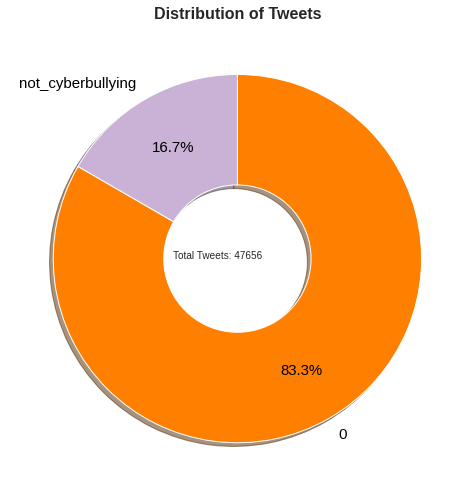

In [ ]:
plt.figure(figsize = (7,7))
sorted_counts = df['class'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets', fontsize = 16);

In [ ]:
A=df[df.sentiment=='religion']
B=df[df.sentiment=='age']
C=df[df.sentiment=='gender']
D=df[df.sentiment=='ethnicity']
E=df[df.sentiment=='other_cyberbullying']
frames = [A,B,C,D,E]
X= pd.concat(frames)
Y=df[df.sentiment=='not_cyberbullying']

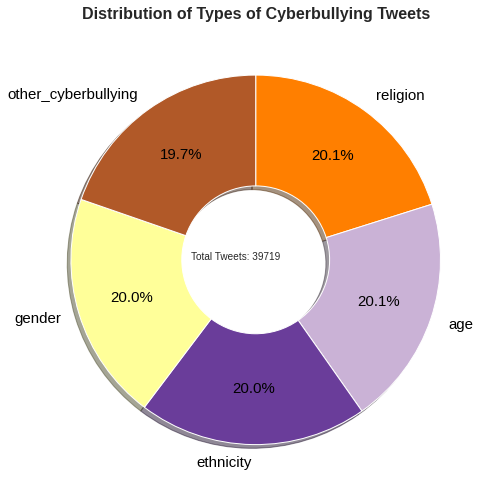

In [ ]:
 plt.figure(figsize = (7,7))
sorted_counts = X['sentiment'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(X.shape[0]))
plt.title('Distribution of Types of Cyberbullying Tweets', fontsize = 16);

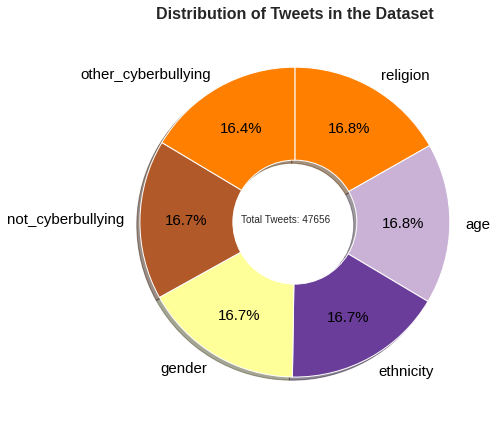

In [ ]:
plt.figure(figsize = (7,7))
sorted_counts = df['sentiment'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

# Cleaning

In [ ]:
# cleaning of the tweets
def clean_tweet(df,field):
    df[field] = df[field].str.replace(r"http\S+"," ")
    df[field] = df[field].str.replace(r"http"," ")
    df[field] = df[field].str.replace(r"@","at")
    df[field] = df[field].str.replace("#[A-Za-z0-9_]+", ' ')
    df[field] = df[field].str.replace(r"[^A-Za-z(),!?@\'\"_\n]"," ")
    df[field] = df[field].str.lower()
    return df

In [ ]:
clean_tweet(df,"tweet")

tweet          sentiment  \
0        in other words  , your food was crapilicious!    not_cyberbullying   
1                   why is   so white?                    not_cyberbullying   
2      atxochitlsuckkks a classy whore? or more red v...  not_cyberbullying   
3      atjason_gio meh   p  thanks for the heads up, ...  not_cyberbullying   
4      atrudhoeenglish this is an isis account preten...  not_cyberbullying   
...                                                  ...                ...   
47687  black ppl aren't expected to do anything, depe...          ethnicity   
47688  turner did not withhold his disappointment  tu...          ethnicity   
47689  i swear to god  this dumb nigger bitch  i have...          ethnicity   
47690  yea fuck you rt attherealexel  if youre a nigg...          ethnicity   
47691  bro  u gotta chill rt atchillshrammy  dog fuck...          ethnicity   

                   class  
0      not_cyberbullying  
1      not_cyberbullying  
2      not_cyberbullying  
3      not_cyberbullying  
4      not_cyberbullying  
...                  ...  
47687                  0  
47688                  0  
47689                  0  
47690                  0  
47691                  0  

[47656 rows x 3 columns]

# Lemmatization

In [ ]:
# Applying Lemmmatizer to remove tenses from texts.
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will'])
corpus = []
def preprocess_tweet(tweet):
    tweet = re.sub(r"won\'t", "will not", tweet)
    tweet = re.sub(r"can\'t", "can not", tweet)
    tweet = re.sub(r"n\'t", " not", tweet)
    tweet = re.sub(r"\'re", " are", tweet)
    tweet = re.sub(r"\'s", " is", tweet)
    tweet = re.sub(r"\'d", " would",tweet)
    tweet = re.sub(r"\'ll", " will", tweet)
    tweet = re.sub(r"\'t", " not", tweet)
    tweet = re.sub(r"\'ve", " have", tweet)
    tweet = re.sub(r"\'m", " am", tweet)
    tweet = re.sub('[^a-zA-Z]',' ',tweet)
    tweet = re.sub(r'[^\x00-\x7f]','',tweet)
    tweet = " ".join([stemmer.stem(word) for word in tweet.split()])
    tweet = [lemmatizer.lemmatize(word) for word in tweet.split() if not word in set(STOPWORDS)]
    tweet = ' '.join(tweet)
    return tweet

df["tweet_clean"] = df["tweet"].apply(preprocess_tweet)

# Further cleaning

In [ ]:
df["tweet_clean"].duplicated().sum()

2546

In [ ]:
df.drop_duplicates("tweet_clean", inplace=True)

In [ ]:
df.shape

(45110, 4)

# Data Integrity

## Distributions

Text(0, 0.5, 'Tweet Length')

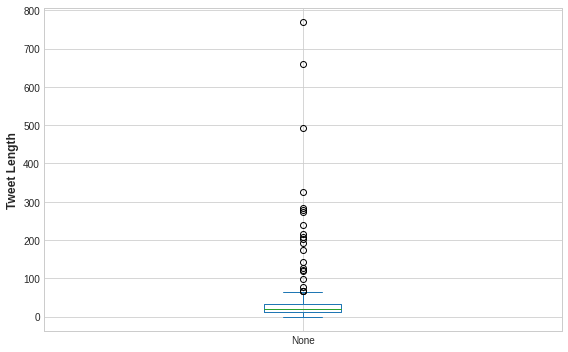

In [ ]:
#Getting the tweet length
tweet_len = pd.Series([len(tweet.split())for tweet in df["tweet"]])
plt.figure(figsize=(8,5))
tweet_len.plot(kind="box")
plt.ylabel("Tweet Length")

In [ ]:
df.sentiment.value_counts()

religion               7942
age                    7863
ethnicity              7830
not_cyberbullying      7777
gender                 7653
other_cyberbullying    6045
Name: sentiment, dtype: int64

Almost balanced, other than other_cyberbullying 

It appears there are lots of tweets of the class "other_cyberbullying" which will need to be removed. Since the class is very unbalanced compared to the other classes and looks too "generic", we decide to remove the tweets labeled belonging to this class.

In [ ]:
df = df[df["sentiment"]!="other_cyberbullying"]

A list of the classes names will also be defined, which will be key for the future plots.

In [ ]:
sentiments = ["religion","age","ethnicity","gender","not bullying"]

Text(0, 0.5, 'Tweet Length')

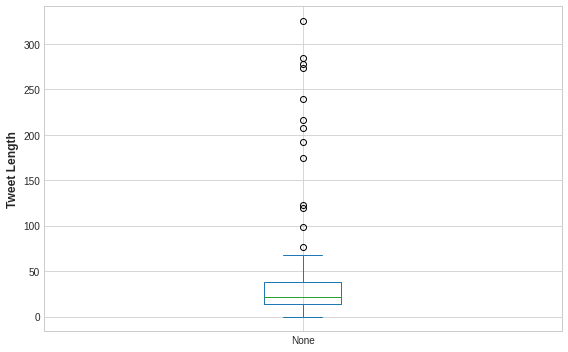

In [ ]:
#Getting the tweet length
tweet_len = pd.Series([len(tweet.split())for tweet in df["tweet"]])
plt.figure(figsize=(8,5))
tweet_len.plot(kind="box")
plt.ylabel("Tweet Length")

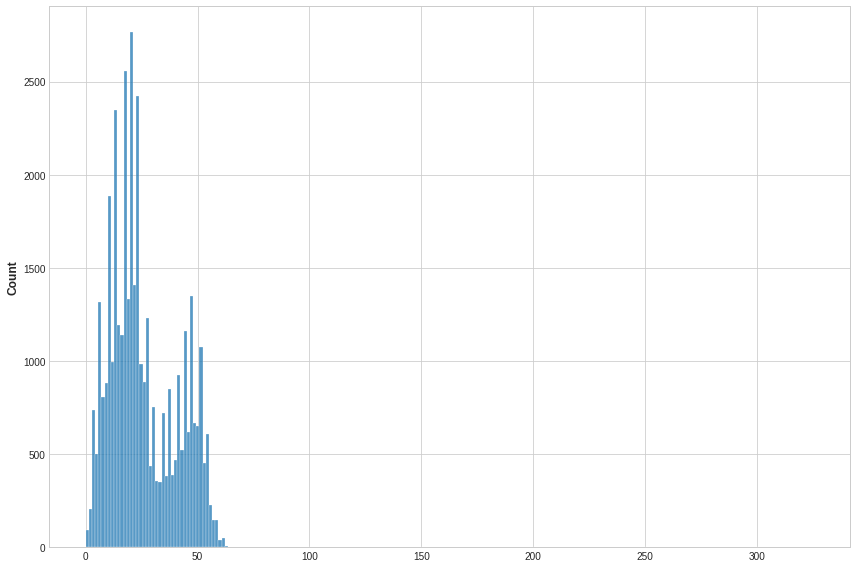

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(tweet_len,palette="yellow")

count    7777.000000
mean        7.689083
std         4.494770
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max       146.000000
Name: Length, dtype: float64

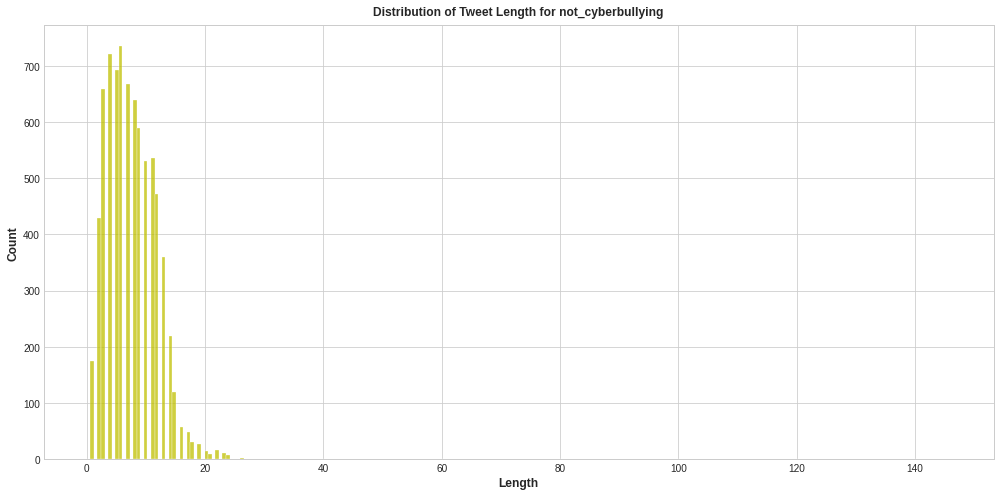

In [ ]:
df["Length"] = df.tweet_clean.str.split().apply(len)
plt.figure(figsize=(14,7))
sns.histplot(df[df["sentiment"]=="not_cyberbullying"]['Length'],color="y")
plt.title("Distribution of Tweet Length for not_cyberbullying")
display(df.Length[df["sentiment"]=="not_cyberbullying"].describe())

count    7653.000000
mean       13.203972
std         7.222842
min         1.000000
25%         8.000000
50%        12.000000
75%        16.000000
max       137.000000
Name: Length, dtype: float64

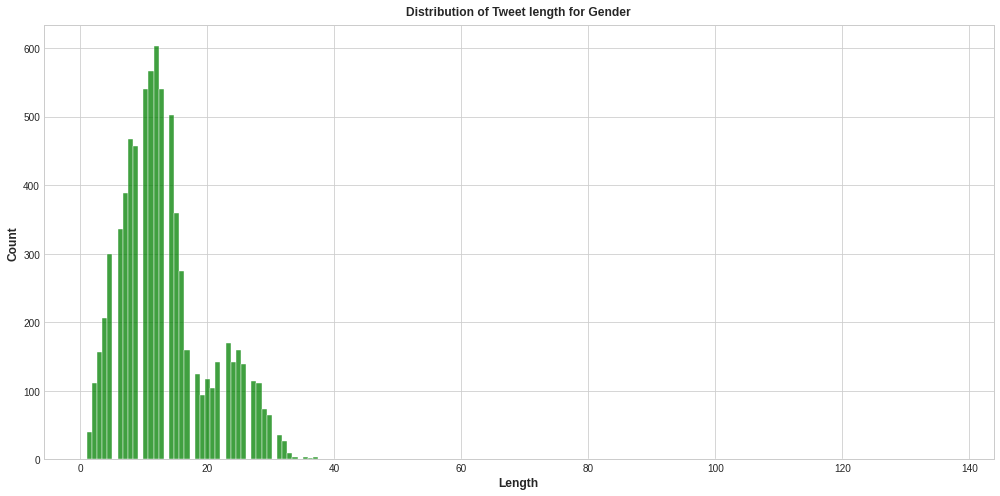

In [ ]:
plt.figure(figsize=(14,7))
sns.histplot(df[df["sentiment"]=="gender"]["Length"],color="g")
plt.title("Distribution of Tweet length for Gender")
display(df.Length[df["sentiment"]=="gender"].describe())

count    7942.000000
mean       18.082347
std         7.179163
min         1.000000
25%        12.000000
50%        19.000000
75%        24.000000
max        46.000000
Name: Length, dtype: float64

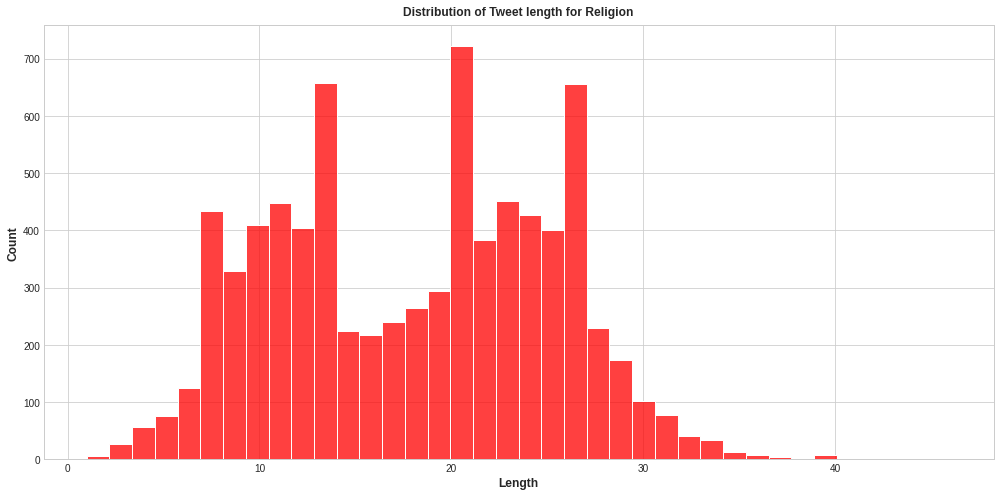

In [ ]:
plt.figure(figsize=(14,7))
sns.histplot(df[df["sentiment"]=="religion"]["Length"],color="r")
plt.title("Distribution of Tweet length for Religion")
display(df.Length[df["sentiment"]=="religion"].describe())

count    7863.000000
mean       16.532367
std         7.291942
min         1.000000
25%        10.000000
50%        16.000000
75%        23.000000
max       138.000000
Name: Length, dtype: float64

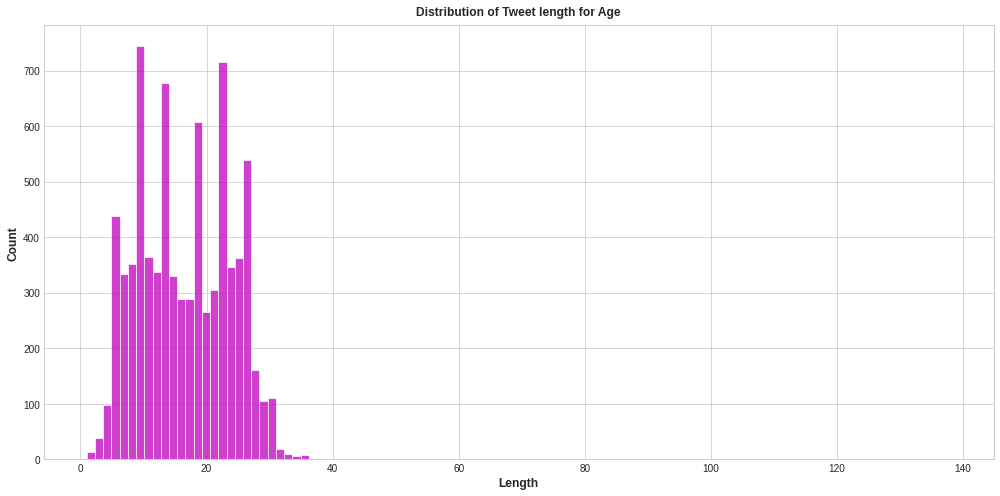

In [ ]:
plt.figure(figsize=(14,7))
sns.histplot(df[df["sentiment"]=="age"]["Length"], color="m")
plt.title('Distribution of Tweet length for Age')
display(df.Length[df["sentiment"]=="age"].describe())

count    7830.000000
mean       14.586335
std         7.117961
min         2.000000
25%        10.000000
50%        13.000000
75%        18.000000
max       183.000000
Name: Length, dtype: float64

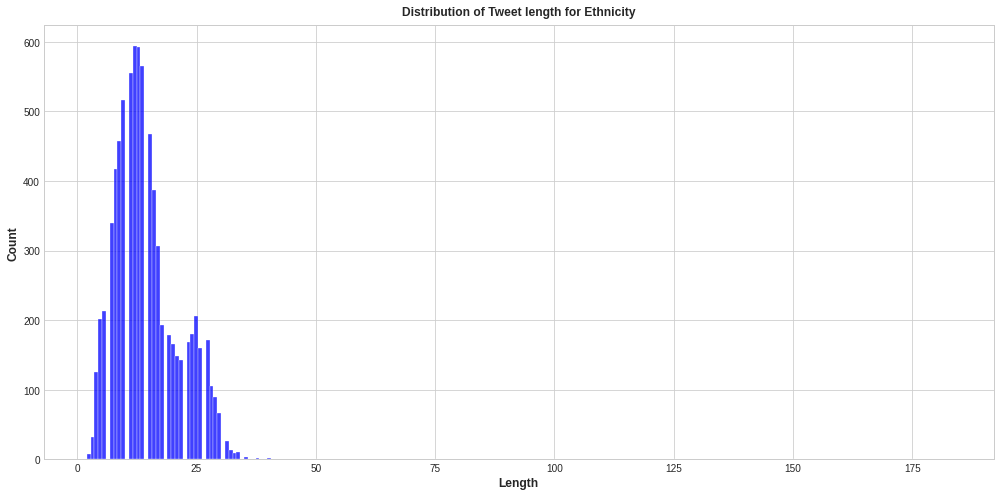

In [ ]:
plt.figure(figsize=(14,7))
sns.histplot(df[df["sentiment"]=="ethnicity"]["Length"], color="b")
plt.title('Distribution of Tweet length for Ethnicity')
display(df.Length[df["sentiment"]=="ethnicity"].describe())

## Data Visualization

In [ ]:
from collections import Counter
from gensim.models import Word2Vec
import plotly.express as px

Checking for the most used words

In [ ]:
df['tweet_list'] = df['tweet_clean'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['tweet_list'] for item in sublist])
tweet_list1 = pd.DataFrame(top.most_common(20))
tweet_list1.columns = ['Words','Count']
tweet_list1.style.background_gradient(cmap='Blues')

In [ ]:
figure = px.bar(tweet_list1, x="Count", y="Words", title='Top 20 words in cyberbullying tweet', orientation='h', 
             width=700, height=700,color='Words')
figure.show()

### Religion

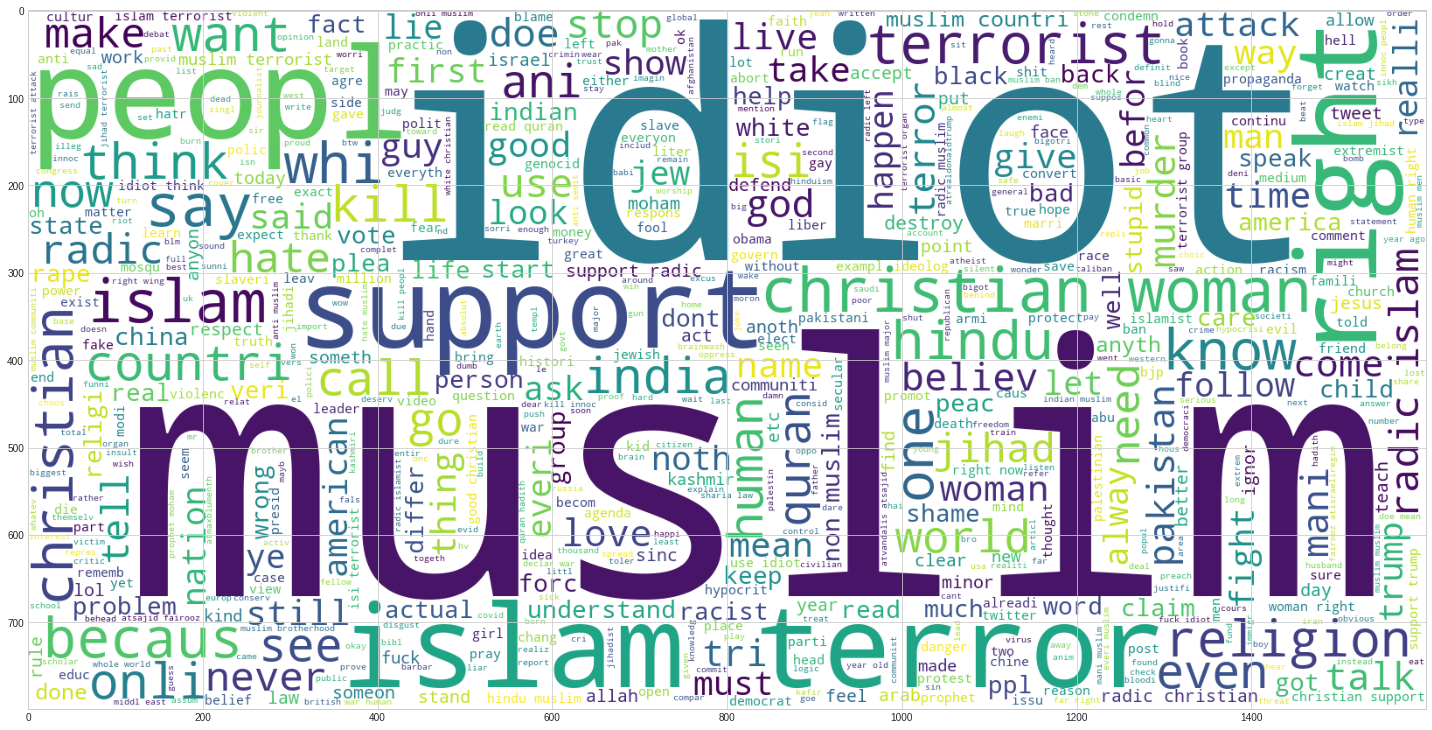

In [ ]:
plt.figure(figsize=(20,20))
wc2 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, 
        background_color="white").generate(" ".join(df[df["sentiment"]=="religion"].tweet_clean))
plt.imshow(wc2)

In [ ]:
not_cyberbullying_type = df[df['sentiment']=='not_cyberbullying']
gender_type = df[df['sentiment']=='gender']
religion_type = df[df['sentiment']=='religion']
other_cyberbullying_type = df[df['sentiment']=='other_cyberbullying']
age_type = df[df['sentiment']=='age']
ethnicity_type = df[df['sentiment']=='ethnicity']

In [ ]:
#Top 20 Words in religion cyberbullying Tweet
top20_r = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])
type_r = pd.DataFrame(top20_r.most_common(20))
type_r.columns = ['Top of Words','Count']
type_r.style.background_gradient(cmap='Greens')

In [ ]:
r_fig = px.bar(type_r, x="Count", y="Top of Words", title='Top 20 Words in Religion Cyberbullying Tweet', orientation='h', 
             width=700, height=700,color='Top of Words')
r_fig.show()

### Ethnicity

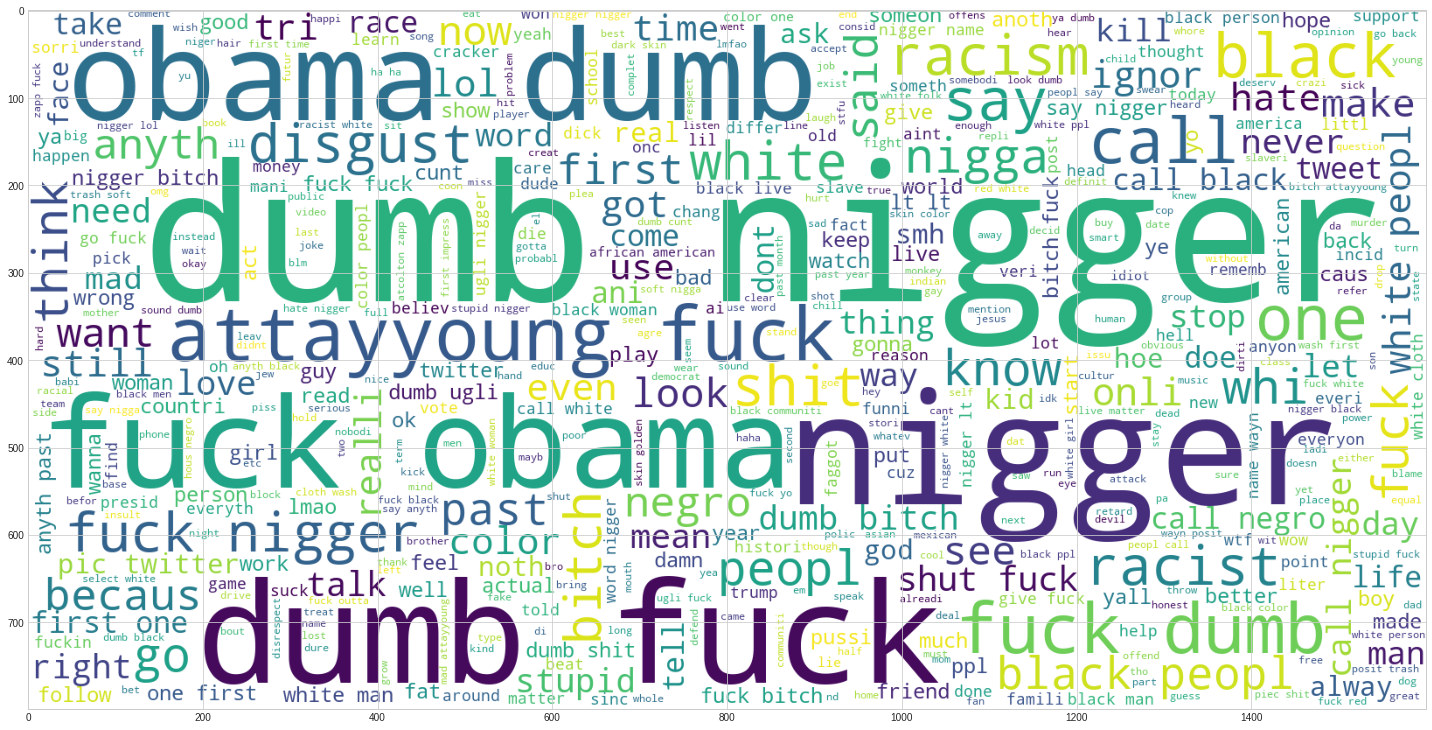

In [ ]:
plt.figure(figsize=(20,20))
wc3 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600,
            background_color="white").generate(" ".join(df[df["sentiment"]=="ethnicity"].tweet_clean))
plt.imshow(wc3)

In [ ]:
#Top 20 Words in Ethnicity Cyberbullying Tweet
top20_e = Counter([item for sublist in ethnicity_type['tweet_list'] for item in sublist])
type_e = pd.DataFrame(top20_e.most_common(20))
type_e.columns = ['Top of Words','Count']
type_e.style.background_gradient(cmap='Greens')

### Not Cyberbullying

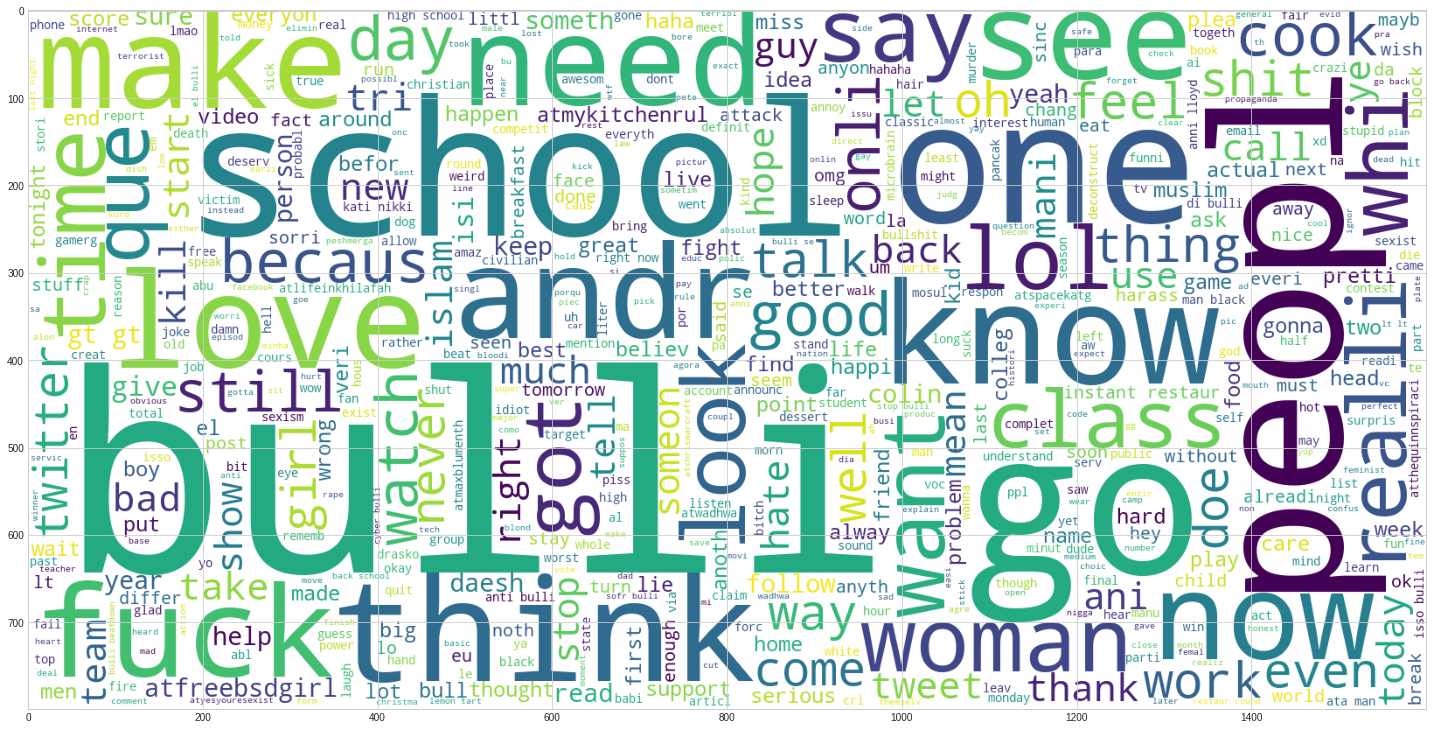

In [ ]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,min_font_size=10, height=800,width=1600,
               background_color="white").generate(" ".join(df[df["sentiment"]=="not_cyberbullying"].tweet_clean))
plt.imshow(wc)

In [ ]:
#Top 20 Words in not cyberbullying Tweet
top20 = Counter([item for sublist in not_cyberbullying_type['tweet_list'] for item in sublist])
type_nc = pd.DataFrame(top20.most_common(20))
type_nc.columns = ['Top of Words','Count']
type_nc.style.background_gradient(cmap='Greens')

### Gender

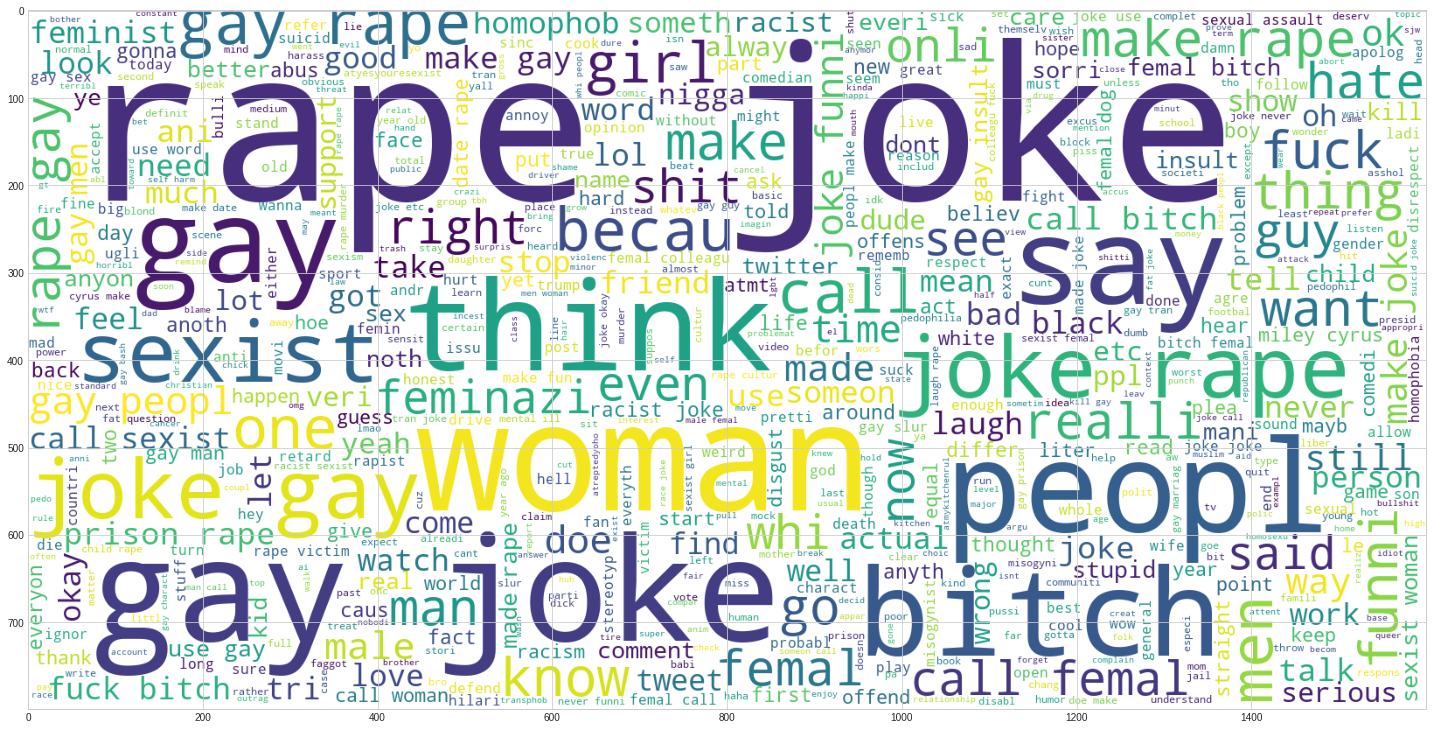

In [ ]:
plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,
        background_color="white").generate(" ".join(df[df["sentiment"]=="gender"].tweet_clean))
plt.imshow(wc1)

In [ ]:
#Top 20 Words in Gender cyberbullying Tweet
top20_gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
type_g = pd.DataFrame(top20_gender.most_common(20))
type_g.columns = ['Top of Words','Count']
type_g.style.background_gradient(cmap='Blues')

# Polarity and subjectivity

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information

In [ ]:
from textblob import TextBlob

In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

df.head()


tweet          sentiment  \
0    in other words  , your food was crapilicious!    not_cyberbullying   
1               why is   so white?                    not_cyberbullying   
2  atxochitlsuckkks a classy whore? or more red v...  not_cyberbullying   
3  atjason_gio meh   p  thanks for the heads up, ...  not_cyberbullying   
4  atrudhoeenglish this is an isis account preten...  not_cyberbullying   

               class                                        tweet_clean  \
0  not_cyberbullying                                word food crapilici   
1  not_cyberbullying                                          whi white   
2  not_cyberbullying     atxochitlsuckkk classi whore red velvet cupcak   
3  not_cyberbullying  atjason gio meh thank head concern anoth angri...   
4  not_cyberbullying  atrudhoeenglish isi account pretend kurdish ac...   

   Length                                         tweet_list  Subjectivity  \
0       3                            [word, food, crapilici]      0.375000   
1       2                                       [whi, white]      0.000000   
2       6  [atxochitlsuckkk, classi, whore, red, velvet, ...      0.466667   
3      10  [atjason, gio, meh, thank, head, concern, anot...      0.600000   
4       8  [atrudhoeenglish, isi, account, pretend, kurdi...      0.000000   

   Polarity  
0  -0.15625  
1   0.00000  
2   0.20000  
3  -0.15000  
4   0.00000

In [ ]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head()

tweet          sentiment  \
0    in other words  , your food was crapilicious!    not_cyberbullying   
1               why is   so white?                    not_cyberbullying   
2  atxochitlsuckkks a classy whore? or more red v...  not_cyberbullying   
3  atjason_gio meh   p  thanks for the heads up, ...  not_cyberbullying   
4  atrudhoeenglish this is an isis account preten...  not_cyberbullying   

               class                                        tweet_clean  \
0  not_cyberbullying                                word food crapilici   
1  not_cyberbullying                                          whi white   
2  not_cyberbullying     atxochitlsuckkk classi whore red velvet cupcak   
3  not_cyberbullying  atjason gio meh thank head concern anoth angri...   
4  not_cyberbullying  atrudhoeenglish isi account pretend kurdish ac...   

   Length                                         tweet_list  Subjectivity  \
0       3                            [word, food, crapilici]      0.375000   
1       2                                       [whi, white]      0.000000   
2       6  [atxochitlsuckkk, classi, whore, red, velvet, ...      0.466667   
3      10  [atjason, gio, meh, thank, head, concern, anot...      0.600000   
4       8  [atrudhoeenglish, isi, account, pretend, kurdi...      0.000000   

   Polarity  Analysis  
0  -0.15625  Negative  
1   0.00000   Neutral  
2   0.20000  Positive  
3  -0.15000  Negative  
4   0.00000   Neutral

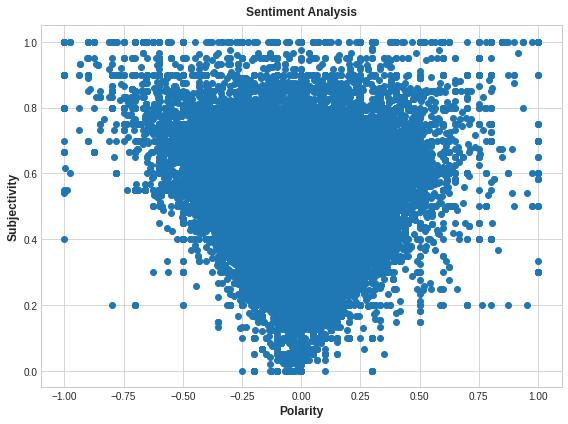

In [ ]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
#for i in range(0, df.shape[0]):
#  plt.scatter(x=df['Polarity'][i], y = df['Subjectivity'][i], color = 'Blue')

x_ax = []
y_ax = []
for index , row in df.iterrows():
  x_ax.append(row['Polarity'])
  y_ax.append(row['Subjectivity'])  
  
plt.scatter(x = x_ax , y = y_ax)

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()

The result are something interesting to see. There seems to be a fairly even distribution in terms of Polarity (x-axis), but the Subjectivity(y-axis) displays what almost looks like a funnel. That is, many of the points are located in the upper part of the grid and gradually taper off towards zero - 1 meaning super opinionated, 0 meaning completely objective language. This also suggests that the more opinionated people are (one way or the other), the more subjective their language.


### printing some of the positive and negative tweets

In [ ]:
no_of_print = 10

In [ ]:
# print all the positive tweets
# ccccccccccccccccccccc
pos_tweets = df[df['Analysis'] == 'Positive']['tweet'].to_list()
j = 1
for q in pos_tweets:
    print(str(j) + ') ' + q)
    j += 1
    if j == no_of_print:
        break

1) atxochitlsuckkks a classy whore? or more red velvet cupcakes?
2) atstockputout everything but mostly my priest
3) love that the best response to the hotcakes they managed to film was a non committal "meh" from some adolescent   
4) best pick up line? hi, you're cute    ?  i love how people call james potter is a bully    mypatronusisyou   
5) kids love   at mohamad bin zayed city                     
6) i still have jack, amsterdam, ciroc, crown, bud light, lime a rita, and cru in my love handles  i feel the jiggle when i walk   
7) atscottyswaggod men are the ones that are going to push the real change  they are the ones in power, generally  we need their help 
8) wishing my arena partner was on   gt   gt   really want to get some pvp happening 
9) atmaxblumenthal atcpassevant atanadumitrescu   post hebdo? lol  events like it are a daily occurrence around the world  why isolate one 


In [ ]:
# print all the negative tweets
# ccccccccccccccccccccc
neg_tweets = df[df['Analysis'] == 'Negative']['tweet'].to_list()
j = 1
for q in neg_tweets:
    print(str(j) + ') ' + q)
    j += 1
    if j == no_of_print:
        break

1) in other words  , your food was crapilicious!  
2) atjason_gio meh   p  thanks for the heads up, but not too concerned about another angry dude on twitter 
3) atraja aab atquickieleaks yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence 
4) karma  i hope it bites kat on the butt  she is just nasty   
5) rebecca black drops out of school due to bullying 
6) rt atkurdsnews  turkish state has killed     children in last    years          eviricitoplulu uk rt eyidee 
7) at xabad dea atkelseytheodore  twitter is basically the angry letters of our generation 
8) now i gotta walk to classss?! i officially hate the stupid bus system!  _ 
9) atfirebomb    atandaasonsan not the first time it's happened  that was probably the worst though 


# Afinn

One method that can be used is the Afinn Score. 

Afinn is the simplest yet popular lexicons used for sentiment analysis developed by Finn Årup Nielsen. It contains 3300+ words with a polarity score associated with each word. In python, there is an in-built function for this lexicon. Low Afinn score indicated that it was a bad tweet, meanwhile more positive means good tweet.

In [ ]:
from afinn import Afinn
afinn = Afinn(language='en')

In [ ]:
df['Affin_sentiment'] = df['tweet'].apply(lambda y : afinn.score(y))

In [ ]:
# Checking AfinScore
def ApplyAfinScore(self):

        DataFrame = self.ReadingData()

        TweetList = DataFrame[df.tweet].to_list()

        AfinScore = []

        for i in TweetList:
            AfinScore.append(afinn.score(i))

        DataFrame['Afin Sentence Score'] = AfinScore
        DataFrame = DataFrame.sort_values(by='Afin Sentence Score', ascending= True)

        return DataFrame



In [ ]:
v = df.sort_values(by=['Affin_sentiment']).head(10)['tweet'].to_list()

In [ ]:
for t in v:
    print (t)
    print ()
    print ()
    print ('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print ()
    print ()

you so black and white trying to live like a nigger    pahahahaha    common is dumb as fuck! 
it's short for huntsman you dumb ass and he'll ya i am fuck gays and niggers    
u were the first one to inspire me to dream   dream no matter how foolish those dreams seem to others  thank u so much for that  ur work has inspired all of us  amp  will continue to inspire generations to come  rip dr  kalam 
i wasn't comparing anything, saying that a book is being used to opress lgbt people now and black people in the past isn't a comparison it's a statement that they both got oppressed due to the same book , not trying to compare struggles but saying the bible is the common denom  
atin_jepan  fuck atfemalejawan for almost tripping me in the hallway, dumb ho nigger bish   lt  you sound a little mad  lmaoooo  
lol ! this bitch looks dumb as fuck now that she already agreed to marry this nigger but then find's out he fucked    other bitches  
young black voters aren t afraid to call by not on his

# Tokenization

In [ ]:
# col_one_list = df['one'].tolist()
df_list = df['tweet_clean'].tolist()


In [ ]:
# BoW method
vectorizer = CountVectorizer() # initialize the vector
X = vectorizer.fit_transform(df_list) # fitting  out text we converted in a list
token = vectorizer.get_feature_names() #Printing the vectorized  words from the text

In [ ]:
# words in the matrix
vocabulary = vectorizer.vocabulary_
#print(vocabulary)

In [ ]:
 # tokenized words
tokens_bow = vectorizer.get_feature_names()
#print(tokens_bow)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#TFIDF method
# passing out bow_list  the Tfidf vectorizer, Our texts are written in english, therefore  we shall use English as our language
vectorizer = TfidfVectorizer(stop_words='english')
bow_X = vectorizer.fit_transform(df_list) # our text is defined  as list_
# The  next code prints for us the vectors in our text
featuter_vector = vectorizer.get_feature_names()
# print(bow_X.toarray())

In [ ]:
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(df)
# print(word_count_vector.shape)
#(5, 16)
#We should have 5 rows (5 docs) and 16 columns (16 unique words, minus single character words):

tokens = cv.get_feature_names()
# print(tokens)
# # ['ate', 'away', 'cat', 'end', 'finally', 'from', 'had', 'house', 'little', 'mouse', 'of', 'ran', 'saw', 'story', 'the', 'tiny']


# print(len(tokens))
# #16

# #there is 5 documents and 16 unique words

# #it returns term-document matrix.
# print(word_count_vector.toarray())
# # [[0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
# #  [0 0 1 0 0 0 0 0 0 1 0 0 1 0 2 0]
# #  [0 1 0 0 0 1 0 1 0 1 0 1 0 0 2 0]
# #  [1 0 1 0 1 0 0 0 0 1 0 0 0 0 2 0]
# #  [0 0 0 1 0 0 0 0 0 1 1 0 0 1 2 0]]

# # create an index for each row
doc_names = ['file{:d}'.format(idx) for idx, _ in enumerate(word_count_vector)]
df_wcv = pd.DataFrame(data=word_count_vector.toarray(), index=doc_names,
                   columns=tokens)
# df.head()

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

#print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tokens,columns=["idf_weights"])

df_idf

idf_weights
affin_sentiment     2.704748
analysis            2.704748
class               2.704748
length              2.704748
polarity            2.704748
sentiment           2.704748
subjectivity        2.704748
tweet               2.704748
tweet_clean         2.704748
tweet_list          2.704748

In [ ]:
df_wcv.head()

affin_sentiment  analysis  class  length  polarity  sentiment  \
file0                0         0      0       0         0          0   
file1                0         0      0       0         0          1   
file2                0         0      1       0         0          0   
file3                0         0      0       0         0          0   
file4                0         0      0       1         0          0   

       subjectivity  tweet  tweet_clean  tweet_list  
file0             0      1            0           0  
file1             0      0            0           0  
file2             0      0            0           0  
file3             0      0            1           0  
file4             0      0            0           0

In [ ]:
df_names = ['tweet{:d}'.format(idx) for idx, _ in enumerate(X)]
df_t = pd.DataFrame(data=X.toarray(), index=df_names,
                  columns=token)
df_t.head()

## Sentiment column encoding

In [ ]:
df['sentiment'] = df['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})

NameError: ignored

# Building a model

## Train test split

In [ ]:
X = df['tweet_clean']
y = df['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=seed_value)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

## Hyper-Parameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import word_tokenize
import nltk
nltk.download('punkt')

In [ ]:
tfidf = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize,min_df=0.00002,max_df=0.70)
X_train_tf = tfidf.fit_transform(X_train.astype('U'))
X_test_tf = tfidf.transform(X_test.astype('U'))

print(f"TF_IDF Model: Train features shape:{X_train_tf.shape} and Test features shape:{X_test_tf.shape}")

In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [ ]:
def param_tuning(clf, param_dict, X_train, y_train, X_test, y_test):
    
    # make scorer object
    scorer = make_scorer(f1_score)

    # perform Grid Search for Parameters
    grid_obj = GridSearchCV(estimator = clf,
                           param_grid = param_dict,
                           scoring = scorer,
                           cv = 5,
                           n_jobs= -1)

    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    
    # Report the before-and-afterscores
    print(clf.__class__.__name__)
    #print("\nOptimized Model\n------")
    #print("Best Parameters: {}".format(grid_fit.best_params_))
    #print("Accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    #print("F1-score: {:.4f}".format(f1_score(y_test, best_predictions)))
    #print("Precision: {:.4f}".format(precision_score(y_test, best_predictions)))
    #print("Recall: {:.4f}".format(recall_score(y_test, best_predictions)))

    print('Best parameters:')
    print(grid_fit.best_params_)
    print("Accuracy: ")
    print(accuracy_score(y_test, best_predictions))
    print('F1-score: ')
    #print(f1_score(y_test, best_predictions))
    print("Precision: ")
    #print(precision_score(y_test, best_predictions))
    print('Recall: ')
    #print(recall_score(y_test, best_predictions))

In [ ]:
param_grid = {
    'n_estimators': [50,150],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 5]
}

clf_rf = RandomForestClassifier()

param_tuning(clf_rf, param_grid, training_data, y_train, testing_data, y_test)


In [ ]:
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
xgb = XGBClassifier(eval_metric="mlogloss",random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42)
nb = MultinomialNB()
mlp = MLPClassifier(random_state=42)

clfs = {
    "Random Forest": rf,
    "Gradient Boosting":gb,
    "AdaBoost": ada,
    "LightGBM": lgb,
    "XGBoost": xgb,
    "Decision Tree":dt,
    "Support Vector Machine":svc,
    "Naive Bayes": nb,
    "Multilayer Perceptron":mlp
}

def fit_model(clf,x_train,y_train,x_test, y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

accuracys = []
#precisions = []

for name,clf in clfs.items():
    curr_acc = fit_model(clf,X_train_tf,y_train,X_test_tf,y_test)
    accuracys.append(curr_acc)
  #  precisions.append(curr_pre)

In [ ]:
models_df = pd.DataFrame({"Models":clfs.keys(),"Accuracy Scores":accuracys}).sort_values('Accuracy Scores',ascending=False)
models_df

In [ ]:
models_df.describe().loc[['min', 'max'], :]

## Random Oversampler

In [ ]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['tweet_clean', 'sentiment']);

In [ ]:
X_train = train_os['tweet_clean'].values
y_train = train_os['sentiment'].values

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

## Support Vector Machine Model

### Splitting the data

In [ ]:
corpus, target_labels, target_names = (df['tweet_clean'], 
                                       [df['sentiment'][label] for 
                                        label in df['sentiment']], 
                                       df['sentiment'])

df_svm = pd.DataFrame({'tweet text': corpus, 'cyberbullying Label': 
                        target_labels, 'cyberbulying Name': target_names})

In [ ]:
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names =\
                                 train_test_split(np.array(df_svm['tweet text']), np.array(df_svm['cyberbullying Label']),
                                                       np.array(df_svm['cyberbulying Name']), test_size=0.33, random_state=42)

train_corpus.shape, test_corpus.shape

In [ ]:
#Importing the necessary Libraries for SVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC ,SVC

### Feature Extractions

In [ ]:
# build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.00002, max_df=0.6)
tv_train_features = tv.fit_transform(train_corpus.astype('U'))

# transform test articles into features
tv_test_features = tv.transform(test_corpus.astype('U'))

print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

### Support Vector Machine Classifier

In [ ]:
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('svm', LinearSVC(random_state=42))])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 1)],
              'svm__C': [1e-5, 1e-4, 1e-2, 1e-1, 1]
}

gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
gs_svm = gs_svm.fit(train_corpus.astype('U'), train_label_names)

In [ ]:
gs_svm.best_estimator_.get_params()

In [ ]:
best_svm_test_score = gs_svm.score(test_corpus.astype('U'), test_label_names)
print('Test Accuracy :', best_svm_test_score)

In [ ]:
svm_results = gs_svm.cv_results_
results_df = pd.DataFrame({'rank': svm_results['rank_test_score'],
                           'params': svm_results['params'], 
                           'cv score (mean)': svm_results['mean_test_score'], 
                           'cv score (std)': svm_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_df

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
svm_predictions = gs_svm.predict(test_corpus.astype('U'))

plot_confusion_matrix(estimator=gs_svm, X=test_corpus, y_true=test_label_names, 
                      xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print('Classification Report for Support Vector Machine:\n',classification_report(test_label_names, svm_predictions, target_names=sentiments))

The performance scores of the algorithm is good, with an overall accuracy of 93%. It is observed that the predictions for the more populated classes have very high F1 scores (over 90%), while for the class "non-cyberbullying" the score is much lower.

# Naive Bayes Model

In [ ]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [ ]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [ ]:
nb_clf = MultinomialNB()

In [ ]:
nb_clf.fit(X_train_tf, y_train)

In [ ]:
nb_pred = nb_clf.predict(X_test_tf)

In [ ]:
print('Classification Report for Naive Bayes:\n',classification_report(y_test, nb_pred, target_names=sentiments))

In [ ]:
conf_matrix(y_test,nb_pred,'Naive Bayes Sentiment Analysis\nConfusion Matrix', sentiments)

The performance scores of the algorithm is good, with an overall accuracy of 82%.
It is observed that the predictions for the more populated classes have very high F1 scores (over 83%), while for the class "non-cyberbullying" the score is much lower.

# PyTorch Bi-LSTM RNN

# Data preprocessing for LSTM

Similarly to what we did with Naive Bayes, we need to preprocess the data: in particular we will tokenize the sentences with a custom defined function.
The sentences will be converted to lists of number with padding to the max number of words in a sentence.

In [ ]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [ ]:
text_len = []
for text in df.tweet_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [ ]:
df['text_len'] = text_len

In [ ]:
max_len = np.max(df['text_len'])
max_len 

In [ ]:
vocabulary, tokenized_column = Tokenize(df["tweet_clean"], max_len)

In [ ]:
df["tweet_clean"].iloc[10]

In [ ]:
tokenized_column[10]

In [ ]:
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [ ]:
EMBEDDING_DIM = 200

In [ ]:
from collections import Counter
from gensim.models import Word2Vec

In [ ]:
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)

In [ ]:
print(f"Vocabulary size: {len(vocabulary) + 1}")

In [ ]:
VOCAB_SIZE = len(vocabulary) + 1 #+1 for the padding

Finally we can define the embedding matrix.

In [ ]:
#define empty embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
    
#fill the embedding matrix with the pre trained values from word2vec
#    corresponding to word (string), token (number associated to the word)
for word, token in vocabulary:
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)



In [ ]:
X = tokenized_column
y = df['sentiment'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=seed_value)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

In [ ]:
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(np.array(X_train),np.array(y_train));

In [ ]:
(unique, counts) = np.unique(y_train_os, return_counts=True)
np.asarray((unique, counts)).T

## PyTorch datasets and dataloaders

The three sets will be transformed to tensor datasets and dataloaders so we can extract the data in batches for the LSTM training, validation and testing.

In [ ]:
train_data = TensorDataset(torch.from_numpy(X_train_os), torch.from_numpy(y_train_os))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True) 
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)

# PyTorch LSTM modeling

In [ ]:
NUM_CLASSES = 5 #We are dealing with a multiclass classification of 5 classes
HIDDEN_DIM = 100 #number of neurons of the internal state (internal neural network in the LSTM)
LSTM_LAYERS = 1 #Number of stacked LSTM layers

LR = 3e-4 #Learning rate
DROPOUT = 0.5 #LSTM Dropout
BIDIRECTIONAL = True #Boolean value to choose if to use a bidirectional LSTM or not
EPOCHS = 5 #Number of training epoch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
NUM_CLASSES = 5 #We are dealing with a multiclass classification of 5 classes
HIDDEN_DIM = 100 #number of neurons of the internal state (internal neural network in the LSTM)
LSTM_LAYERS = 1 #Number of stacked LSTM layers

LR = 3e-4 #Learning rate
DROPOUT = 0.5 #LSTM Dropout
BIDIRECTIONAL = True #Boolean value to choose if to use a bidirectional LSTM or not
EPOCHS = 5 #Number of training epoch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
class BiLSTM_Sentiment_Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional,batch_size, dropout):
        super(BiLSTM_Sentiment_Classifier,self).__init__()
        
        self.lstm_layers = lstm_layers
        self.num_directions = 2 if bidirectional else 1
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.batch_size = batch_size
        

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=lstm_layers,
                            dropout=dropout,
                            bidirectional=bidirectional,
                            batch_first=True)

        self.fc = nn.Linear(hidden_dim*self.num_directions, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        self.batch_size = x.size(0)
        ##EMBEDDING LAYER
        embedded = self.embedding(x)
        #LSTM LAYERS
        out, hidden = self.lstm(embedded, hidden)
        #Extract only the hidden state from the last LSTM cell
        out = out[:,-1,:]
        #FULLY CONNECTED LAYERS
        out = self.fc(out)
        out = self.softmax(out)

        return out, hidden

    def init_hidden(self, batch_size):
        #Initialization of the LSTM hidden and cell states
        h0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        c0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        hidden = (h0, c0)
        return hidden

In [ ]:
model = BiLSTM_Sentiment_Classifier(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM,NUM_CLASSES, LSTM_LAYERS,BIDIRECTIONAL, BATCH_SIZE, DROPOUT)
model = model.to(DEVICE)

#Initialize embedding with the previously defined embedding matrix
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
#Allow the embedding matrix to be fined tuned to better adapt to out dataset and get higher accuracy
model.embedding.weight.requires_grad=True

print(model)

In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay = 5e-6)

# LSTM Training loop

Now we will define a custom training loop, where we include an early stopping functionality, and save only the best models in terms of validation accuracy.

In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 4
early_stopping_counter = 0

valid_acc_max = 0 # Initialize best accuracy top 0

for e in range(EPOCHS):

    #lists to host the train and validation losses of every batch for each epoch
    train_loss, valid_loss  = [], []
    #lists to host the train and validation accuracy of every batch for each epoch
    train_acc, valid_acc  = [], []

    #lists to host the train and validation predictions of every batch for each epoch
    y_train_list, y_val_list = [], []

    #initalize number of total and correctly classified texts during training and validation
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0


    ####TRAINING LOOP####

    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE) #load features and targets in device

        h = model.init_hidden(labels.size(0))

        model.zero_grad() #reset gradients 

        output, h = model(inputs,h) #get output and hidden states from LSTM network
        
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        
        optimizer.step()

        y_pred_train = torch.argmax(output, dim=1) #get tensor of predicted values on the training set
        y_train_list.extend(y_pred_train.squeeze().tolist()) #transform tensor to list and the values to the list
        
        correct += torch.sum(y_pred_train==labels).item() #count correctly classified texts per batch
        total += labels.size(0) #count total texts per batch

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    ####VALIDATION LOOP####
    
    with torch.no_grad():
        
        model.eval()
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    #Save model if validation accuracy increases
    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0 #reset counter if validation accuracy increases
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1 #increase counter if validation accuracy does not increase
        
    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')


In [ ]:
# Loading the best model
model.load_state_dict(torch.load('./state_dict.pt'))

# LSTM Testing

In [ ]:
model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    test_h = model.init_hidden(labels.size(0))

    output, val_h = model(inputs, test_h)
    y_pred_test = torch.argmax(output, dim=1)
    y_pred_list.extend(y_pred_test.squeeze().tolist())
    y_test_list.extend(labels.squeeze().tolist())

In [ ]:
print('Classification Report for Bi-LSTM :\n', classification_report(y_test_list, y_pred_list, target_names=sentiments))

In [ ]:
conf_matrix(y_test_list,y_pred_list,'PyTorch Bi-LSTM Sentiment Analysis\nConfusion Matrix', sentiments)

The performance scores of the algorithm are very high, with an overall accuracy of 92%.
In particular, the F1 scores for the more populated classes are over 88%

## Time Frequency-Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import word_tokenize
import nltk
nltk.download('punkt')

In [ ]:
tfidf = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize,min_df=0.00002,max_df=0.70)
X_train_tf = tfidf.fit_transform(X_train.astype('U'))
X_test_tf = tfidf.transform(X_test.astype('U'))

print(f"TF_IDF Model: Train features shape:{X_train_tf.shape} and Test features shape:{X_test_tf.shape}")

In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer

In [ ]:
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(df)
# print(word_count_vector.shape)
#(5, 16)
#We should have 5 rows (5 docs) and 16 columns (16 unique words, minus single character words):

tokens = cv.get_feature_names()
# print(tokens)
# # ['ate', 'away', 'cat', 'end', 'finally', 'from', 'had', 'house', 'little', 'mouse', 'of', 'ran', 'saw', 'story', 'the', 'tiny']


# print(len(tokens))
# #16

# #there is 5 documents and 16 unique words

# #it returns term-document matrix.
# print(word_count_vector.toarray())
# # [[0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
# #  [0 0 1 0 0 0 0 0 0 1 0 0 1 0 2 0]
# #  [0 1 0 0 0 1 0 1 0 1 0 1 0 0 2 0]
# #  [1 0 1 0 1 0 0 0 0 1 0 0 0 0 2 0]
# #  [0 0 0 1 0 0 0 0 0 1 1 0 0 1 2 0]]

# # create an index for each row
doc_names = ['file{:d}'.format(idx) for idx, _ in enumerate(word_count_vector)]
df_count = pd.DataFrame(data=word_count_vector.toarray(), index=doc_names,
                   columns=tokens)
# df.head()

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

#print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=tokens,columns=["idf_weights"])

df_idf

In [ ]:
# Top 20 words with high idf

df_idf_sorted_top = df_idf.sort_values(["idf_weights"],ascending = [False])
df_idf_sorted_top.head(20)

In [ ]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [ ]:
df_new = df.copy()

In [ ]:
text_len = []
for text in df_new.tweet_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [ ]:
df_new['text_len'] = text_len

In [ ]:
df = df_new[df_new['text_len'] > 3]

In [ ]:
df.sort_values(by=['text_len'], ascending=False)

In [ ]:
vocabulary, tokenized_column = Tokenize (df_new['tweet_clean'], max_len)

# Web Scrapping

In [ ]:
from search_engines import Duckduckgo

engine = Duckduckgo()
results = engine.search("cyberbullying")
links = results.links()

#print(links)

ModuleNotFoundError: ignored

In [ ]:
from bs4 import BeautifulSoup
import requests

link = links[1]

soup_ = BeautifulSoup(requests.get(link).text, 'html.parser')
articles = soup_.find_all('div', class_='streamItem streamItem--postPreview js-streamItem')

In [ ]:
soup_ = BeautifulSoup(requests.get(link).text, 'html.parser')
articles = soup_.find_all('div', class_='streamItem streamItem--postPreview js-streamItem')

In [ ]:
v = BeautifulSoup (requests.get(link).text, 'html.parser')

In [ ]:
def getwebtext (link):
  soup_ = BeautifulSoup(requests.get(link).text, 'html.parser')
  articles = soup_.find_all('div', class_='streamItem streamItem--postPreview js-streamItem')
  v = BeautifulSoup (requests.get(link).text, 'html.parser')
  v = BeautifulSoup (requests.get(link).text, 'html.parser')

  return (v.get_text())

In [ ]:
web_df = pd.DataFrame(columns= ['website' , 'text'])

In [ ]:
web_df['website'] = links

In [ ]:
for index , row in web_df.iterrows():
  web_df.loc[index , 'text'] = getwebtext(row['website'])